In [1]:
from fastai.vision import *
from fastai.metrics import accuracy
from fastai.basic_data import *
import pandas as pd


In [92]:
path= Path('D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs')

In [93]:
from fastai.datasets import datapath4file
path = datapath4file(f'{(path)}')
dest_folder = path.as_posix()
print(dest_folder)

D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs


In [94]:
path.ls

<bound method <lambda> of WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs')>

In [76]:
train_path = path/'train'
print('Training Data folders: ',train_path.ls())

Training Data folders:  [WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs/train/Black-grass'), WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs/train/Charlock'), WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs/train/Cleavers'), WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs/train/Common Chickweed'), WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs/train/Common wheat'), WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs/train/Fat Hen'), WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs/train/Loose Silky-bent'), WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs/train/Maize'), WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs/train/Scentless Mayweed'), WindowsPath('D:/Riti

In [77]:
test_path = path/'test'
print('Test set files count: ', len(test_path.ls()))

Test set files count:  794


In [7]:
print('sample: ',test_path.ls()[:10])

sample:  [WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs/test/0021e90e4.png'), WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs/test/003d61042.png'), WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs/test/007b3da8b.png'), WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs/test/0086a6340.png'), WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs/test/00c47e980.png'), WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs/test/00d090cde.png'), WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs/test/00ef713a8.png'), WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs/test/01291174f.png'), WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs/test/026716f9b.png'), WindowsPath('D:/Ritika Agar

In [8]:
# Flat operator for list:
flat_list = lambda l: [item for sublist in l for item in sublist] # flat operator for list

In [9]:
# Create list of all files
all_files = flat_list([d.glob('*') for d in train_path.glob('*')])
np.random.shuffle(all_files) # Ensure no bias from ordering
print('Files count: ' + str(len(all_files)))
print('sample: ', all_files[:10])
files = all_files # Assign files scope to all

Files count: 4750
sample:  [WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs/train/Cleavers/184e9eb16.png'), WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs/train/Black-grass/1276dffba.png'), WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs/train/Sugar beet/11d370bcc.png'), WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs/train/Scentless Mayweed/b75110745.png'), WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs/train/Fat Hen/53c6c6221.png'), WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs/train/Common Chickweed/19a44418c.png'), WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs/train/Scentless Mayweed/fdc37b24c.png'), WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs/train/Loose Silky-bent/de8b3b16b.png')

In [10]:
import random
items_count = int(len(all_files) * .1)
files = random.sample(all_files,items_count)

print('Files count: ' + str(len(files)))

Files count: 475


In [11]:
# extracting the class from file name
extractClass = lambda l: Path(l[l.rfind('train')+len('train')+1:]).parent.as_posix()

In [12]:
# Compute labels for all files
labels = list(map(extractClass, map(Path.as_posix, files)))
print('Sample 1: ', list(labels)[:15])
print('Sample 2: ', list(labels)[-15:])

Sample 1:  ['Loose Silky-bent', 'Common wheat', 'Common Chickweed', 'Small-flowered Cranesbill', 'Common Chickweed', 'Small-flowered Cranesbill', 'Cleavers', 'Maize', 'Loose Silky-bent', 'Scentless Mayweed', 'Fat Hen', 'Common Chickweed', 'Loose Silky-bent', 'Charlock', 'Sugar beet']
Sample 2:  ['Common Chickweed', 'Sugar beet', 'Fat Hen', 'Sugar beet', 'Fat Hen', 'Common Chickweed', 'Sugar beet', 'Scentless Mayweed', 'Scentless Mayweed', 'Small-flowered Cranesbill', 'Common Chickweed', 'Fat Hen', 'Scentless Mayweed', 'Shepherds Purse', 'Common Chickweed']


In [95]:
path_img = path/'train'
path_test=path/'test'

In [96]:
(path/'train').ls()

[WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs/train/Black-grass'),
 WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs/train/Charlock'),
 WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs/train/Cleavers'),
 WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs/train/Common Chickweed'),
 WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs/train/Common wheat'),
 WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs/train/Fat Hen'),
 WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs/train/Loose Silky-bent'),
 WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs/train/Maize'),
 WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs/train/Scentless Mayweed'),
 WindowsPath('D:/Ritika Agarwal/Hack

In [97]:
(path/'test').ls()

[WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs/test/0021e90e4.png'),
 WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs/test/003d61042.png'),
 WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs/test/007b3da8b.png'),
 WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs/test/0086a6340.png'),
 WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs/test/00c47e980.png'),
 WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs/test/00d090cde.png'),
 WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs/test/00ef713a8.png'),
 WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs/test/01291174f.png'),
 WindowsPath('D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs/test/026716f9b.png'),
 WindowsPath('D:/Ritika Agar

In [110]:
np.random.seed(42)
tfms = get_transforms(flip_vert=True, max_lighting=0.3, max_zoom=1.05, max_warp=0.)
data = ImageDataBunch.from_folder(path, valid_pct=0.2,test='test',
        ds_tfms=tfms, size=224,bs=32,padding_mode='zeros', num_workers=1).normalize(imagenet_stats)

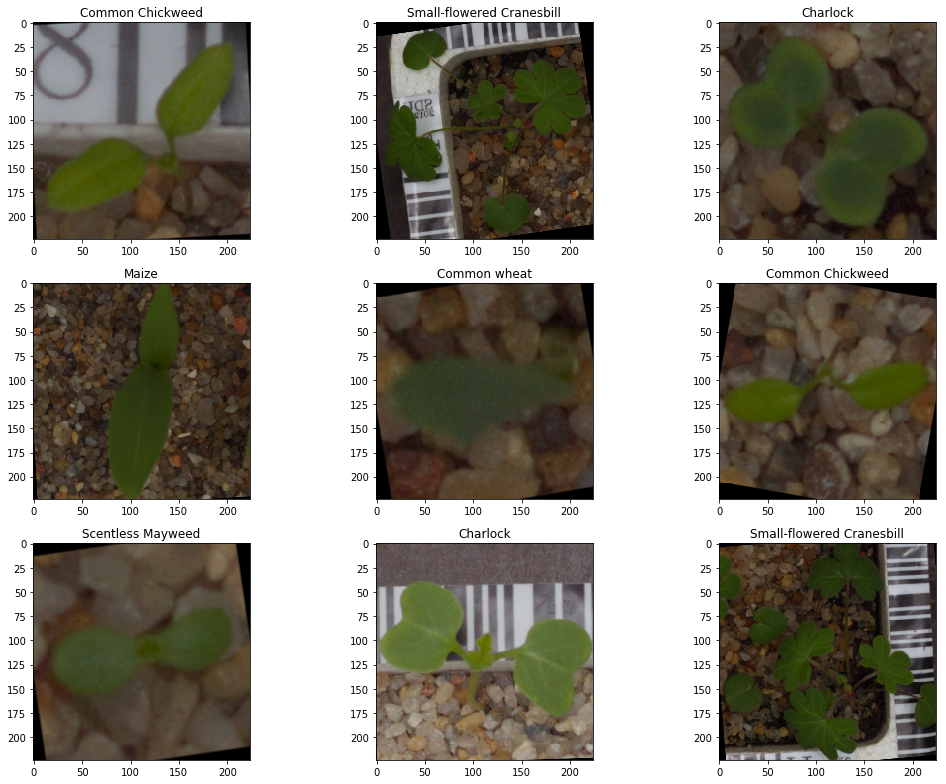

In [111]:
data.show_batch(rows=3, figsize=(15,11), hide_axis=False)

In [112]:
# Sort and Show classes
print('Classes: ',data.classes)
print('len: ',len(data.classes),data.c)

Classes:  ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']
len:  12 12


In [113]:
# To create a RESNET 34 with pretrained weights
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [114]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate
1,1.648620,0.819253,0.269474
2,0.832448,0.502291,0.194737
3,0.571760,0.338625,0.130526
4,0.476137,0.286173,0.113684
5,0.412066,0.272165,0.106316


In [115]:
learn.save('plant34')

In [116]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

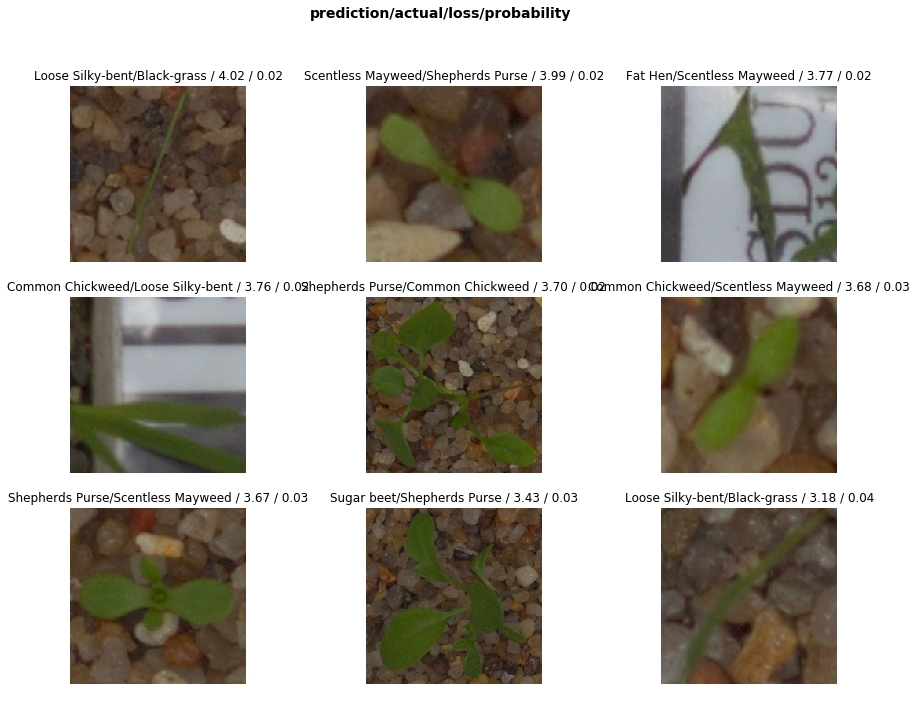

In [117]:
interp.plot_top_losses(9, figsize=(15,11))

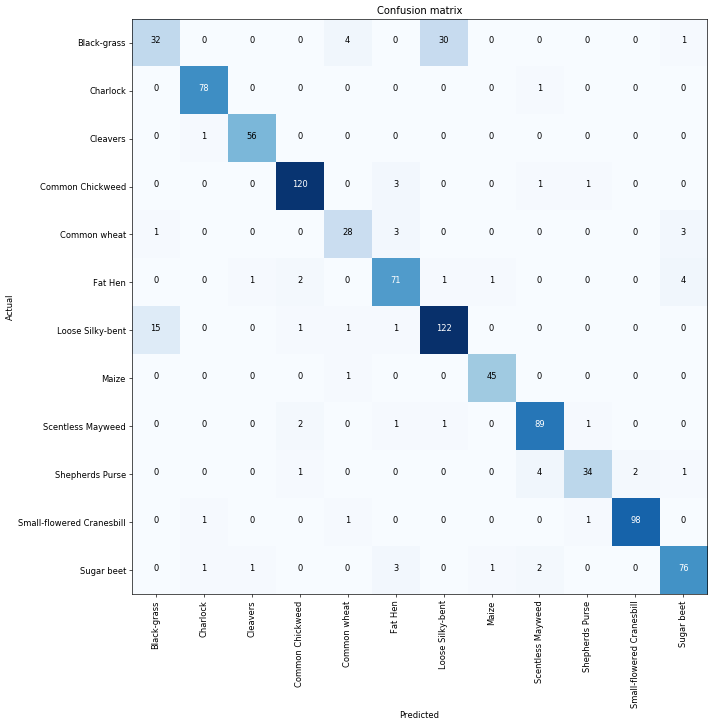

In [118]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [119]:
interp.most_confused(min_val=2)

[('Black-grass', 'Loose Silky-bent', 30),
 ('Loose Silky-bent', 'Black-grass', 15),
 ('Black-grass', 'Common wheat', 4),
 ('Fat Hen', 'Sugar beet', 4),
 ('Shepherds Purse', 'Scentless Mayweed', 4),
 ('Common Chickweed', 'Fat Hen', 3),
 ('Common wheat', 'Fat Hen', 3),
 ('Common wheat', 'Sugar beet', 3),
 ('Sugar beet', 'Fat Hen', 3)]

In [120]:
learn.unfreeze()

In [121]:

learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate
1,0.449955,0.225575,0.082105


In [123]:
learn.load('plant34');

In [124]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


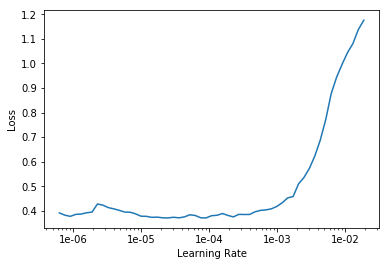

In [125]:
learn.recorder.plot()

In [126]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-3))

epoch,train_loss,valid_loss,error_rate
1,0.381670,0.244963,0.098947
2,0.275201,0.199209,0.074737


In [127]:

learn.save('plant34')

In [128]:
learn.layer_groups

[Sequential(
   (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
   (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (2): ReLU(inplace)
   (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
   (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (6): ReLU(inplace)
   (7): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   (8): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (9): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (11): ReLU(inplace)
   (12): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   (13): BatchNorm2d(64, eps=1e-05, momentum=0.1, affi

In [133]:
learn.fit_one_cycle(4,max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.251451,0.185875,0.066316
2,0.238419,0.173281,0.066316
3,0.224204,0.165095,0.057895
4,0.206289,0.162855,0.057895


In [134]:
learn.save('plant34')

In [135]:
filename = 'D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs/test/0ad9e7dfb.png'

In [136]:
img = open_image(filename)
losses = learn.predict(img)
prediction = losses[0];
prediction

Category Sugar beet

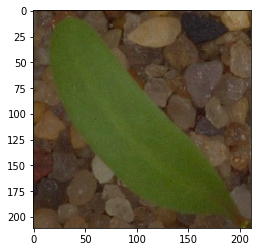

In [138]:
import matplotlib.pyplot as plt

import matplotlib.image as mpimg
img=mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

In [139]:
filename1 = 'D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs/test/1f290e016.png'

In [140]:
img = open_image(filename1)
losses = learn.predict(img)
prediction = losses[0];
prediction

Category Scentless Mayweed

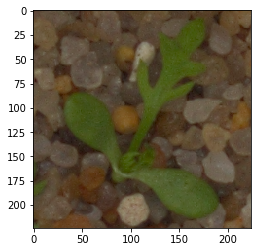

In [141]:
img=mpimg.imread(filename1)
imgplot = plt.imshow(img)
plt.show()

In [142]:
interp = ClassificationInterpretation.from_learner(learn)

In [143]:
interp.most_confused(min_val=2)

[('Black-grass', 'Loose Silky-bent', 22),
 ('Loose Silky-bent', 'Black-grass', 7),
 ('Shepherds Purse', 'Scentless Mayweed', 3)]

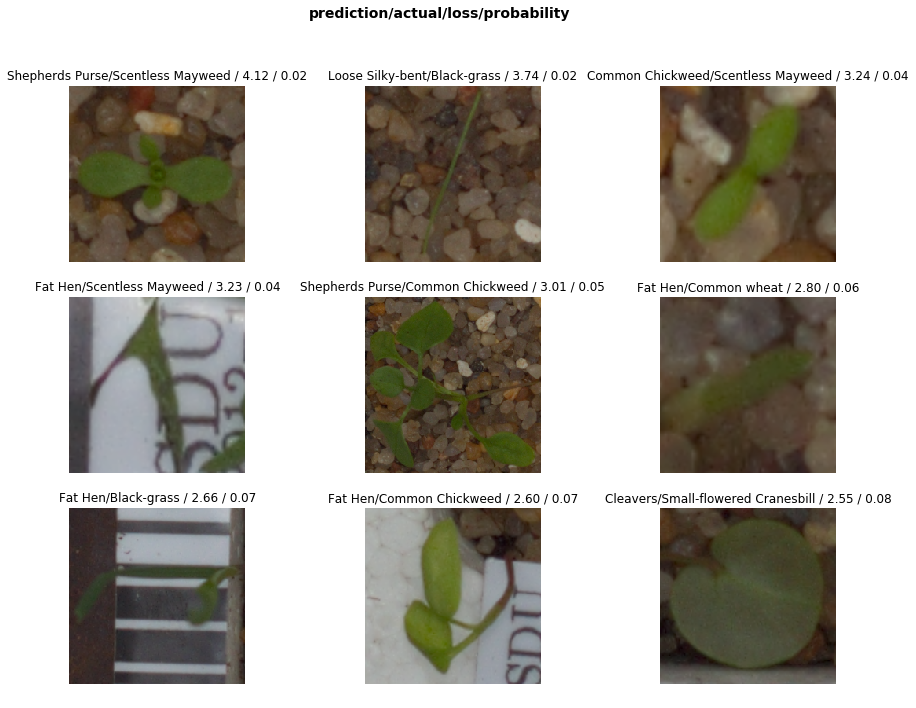

In [144]:
interp.plot_top_losses(9, figsize=(15,11))

In [146]:
df=pd.read_csv('D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs/sample_submission.csv')

In [148]:
print(df.head())

            file     species
0  0021e90e4.png  Sugar beet
1  003d61042.png  Sugar beet
2  007b3da8b.png  Sugar beet
3  0086a6340.png  Sugar beet
4  00c47e980.png  Sugar beet


In [150]:
#GenerateTestPredictionAndFile(plant_celllearn_101,'baseline_1plant_seedling_fast_ai_resnet.csv')
imagepreds = []
fileids = []
for file in os.listdir('D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs/test/'):
    filename = os.path.join('D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/imgs/test/', file)
    imgtest = open_image(filename)
    predictionarray = learn.predict(imgtest)
    file
    str(predictionarray[0])
    fileids.append(file)
    imagepreds.append(str(predictionarray[0]))
df1 = pd.DataFrame({'file':fileids, 'species':imagepreds})
#df.to_csv(TestFileName, index=False,compression='gzip')
df1.to_csv('D:/Ritika Agarwal/Hackathons/Kaggle/Plant_Seedlings_Classification/plant_seedling_output.csv', index=False)
df1.head()

,file,species
0,0021e90e4.png,Small-flowered Cranesbill
1,003d61042.png,Fat Hen
2,007b3da8b.png,Sugar beet
3,0086a6340.png,Common Chickweed
4,00c47e980.png,Sugar beet
